# Observer Pattern

Observer Pattern

Head First Design Patterns example in TypeScript

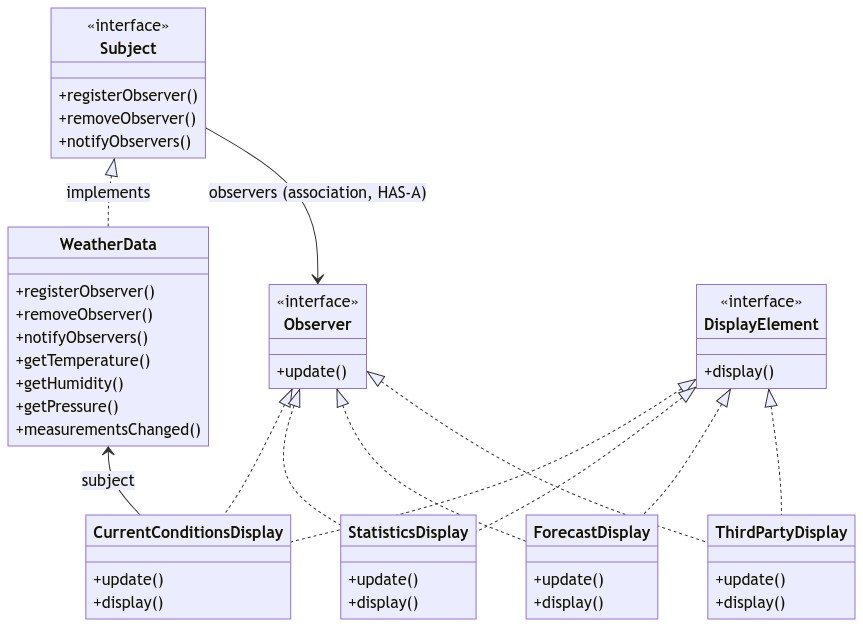


In [ ]:
//#region Code

interface Subject {
  registerObserver(o: Observer): void;
  removeObserver(o: Observer): void;
  notifyObservers(): void;
}

interface Observer {
  update(temp: number, humidity: number, pressure: number): void;
}

interface DisplayElement {
  display(): void;
}

class WeatherData implements Subject {
  private observers: Observer[];
  private temperature: number;
  private humidity: number;
  private pressure: number;

  constructor() {
    this.observers = [];
  }

  registerObserver(o: Observer): void {
    const isExist = this.observers.indexOf(o) !== -1;

    if (isExist) return;

    this.observers.push(o);
  }

  removeObserver(o: Observer): void {
    const index = this.observers.indexOf(o);

    if (index === -1) return;

    this.observers.splice(index, 1);
  }

  notifyObservers(): void {
    this.observers.forEach(o => o.update(this.temperature, this.humidity, this.pressure));
  }

  measurementsChange() {
    this.notifyObservers();
  }

  setMeasurements(temperature: number, humidity: number, pressure: number) {
    this.temperature = temperature;
    this.humidity = humidity;
    this.pressure = pressure;

    this.measurementsChange();
  }
}

//#region Displays

class CurrentConditionsDisplay implements Observer, DisplayElement {
  private temperature: number;
  private humidity: number;
  private weatherData: WeatherData;

  constructor(weatherData: WeatherData) {
    this.weatherData = weatherData;
    this.weatherData.registerObserver(this);
  }

  display(): void {
    console.log(`Current conditions: ${this.temperature}F degrees and ${this.humidity}% humidity`)
  }

  update(temperature: number, humidity: number, pressure: number): void {
    this.temperature = temperature;
    this.humidity = humidity;
    this.display();
  }
}

class StatisticsDisplay implements Observer, DisplayElement {
  private maxTemp = 0.0;
  private minTemp = 200;
  private tempSum = 0.0;
  private numReadings = 0;
  private weatherData: WeatherData;

  constructor(weatherData: WeatherData) {
    this.weatherData = weatherData;
    this.weatherData.registerObserver(this);
  }

  display(): void {
    console.log(`Avg / Max / Min temperature = ${this.tempSum/this.numReadings} / ${this.maxTemp} / ${this.minTemp}`);
  }

  update(temp: number, humidity: number, pressure: number): void {
    this.tempSum += temp;
		this.numReadings++;

		if (temp > this.maxTemp) {
			this.maxTemp = temp;
		}
 
		if (temp < this.minTemp) {
			this.minTemp = temp;
		}

    this.display();
  }
}

class ForecastDisplay implements Observer, DisplayElement {
	private currentPressure = 29.92;
	private lastPressure: number;
	private weatherData: WeatherData;

	constructor(weatherData: WeatherData) {
		this.weatherData = weatherData;
		this.weatherData.registerObserver(this);
	}

	update(temp: number, humidity: number, pressure: number): void {
    this.lastPressure = this.currentPressure;
		this.currentPressure = pressure;

		this.display();
	}

	display(): void {
		console.log('Forecast:');
		if (this.currentPressure > this.lastPressure) {
			console.log('Improving weather on the way!');
		} else if (this.currentPressure == this.lastPressure) {
			console.log('More of the same');
		} else if (this.currentPressure < this.lastPressure) {
			console.log('Watch out for cooler, rainy weather');
		}
	}
}

//#endregion

//#region Main

(function() {

  const weatherData = new WeatherData();
  
  const currentDisplay = new CurrentConditionsDisplay(weatherData);
  const statisticsDisplay = new StatisticsDisplay(weatherData);
  const forecastDisplay = new ForecastDisplay(weatherData);
  
  weatherData.setMeasurements(80, 65, 30.4);
  weatherData.setMeasurements(82, 70, 29.2);
  weatherData.setMeasurements(78, 90, 29.2);

})();

//#endregion

//#endregion

Current conditions: 80F degrees and 65% humidity
Avg / Max / Min temperature = 80 / 80 / 80
Forecast:
Improving weather on the way!
Current conditions: 82F degrees and 70% humidity
Avg / Max / Min temperature = 81 / 82 / 80
Forecast:
Watch out for cooler, rainy weather
Current conditions: 78F degrees and 90% humidity
Avg / Max / Min temperature = 80 / 82 / 78
Forecast:
More of the same


In [ ]:
//#region Add heat index display

class HeatIndexDisplay implements Observer, DisplayElement {
  private temperature: number;
  private humidity: number;
  private heatIndex: number;

  private weatherData: WeatherData;

  constructor(weatherData: WeatherData) {
		this.weatherData = weatherData;
		this.weatherData.registerObserver(this);
	}
  
  display(): void {
    console.log(`Heat index is ${this.heatIndex}`);
  }

  update(temp: number, humidity: number, pressure: number): void {
    this.temperature = temp;
    this.humidity = humidity;

    this.heatIndex = this.getHeatIndex(this.temperature, this.humidity);
    this.display();
  }

  private getHeatIndex(t: number, rh: number): number {
    return ((16.923 + (0.185212 * t) + (5.37941 * rh) - (0.100254 * t * rh) +
		(0.00941695 * (t * t)) + (0.00728898 * (rh * rh)) +
		(0.000345372 * (t * t * rh)) - (0.000814971 * (t * rh * rh)) +
		(0.0000102102 * (t * t * rh * rh)) - (0.000038646 * (t * t * t)) + (0.0000291583 *  
		(rh * rh * rh)) + (0.00000142721 * (t * t * t * rh)) +
		(0.000000197483 * (t * rh * rh * rh)) - (0.0000000218429 * (t * t * t * rh * rh)) +     
		0.000000000843296 * (t * t * rh * rh * rh)) -
		(0.0000000000481975 * (t * t * t * rh * rh * rh)));
  }
}

//#region Main

(function() {

  const weatherData = new WeatherData();
  
  const heatIndexDisplay = new HeatIndexDisplay(weatherData);
  
  weatherData.setMeasurements(80, 65, 30.4);
  weatherData.setMeasurements(82, 70, 29.2);
  weatherData.setMeasurements(78, 90, 29.2);

})();

//#endregion

//#endregion

Heat index is 82.95535063710001
Heat index is 86.90123306385205
Heat index is 83.64967139559604


Refactoring Guru Observer Pattern in TypeScript

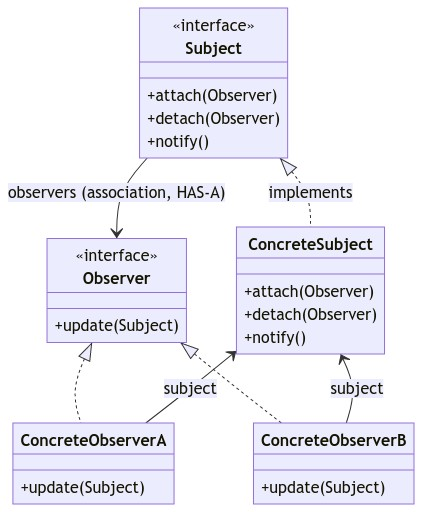


In [ ]:
//#region Code

interface ISubject {
  attach(observer: IObserver): void;
  detach(observer: IObserver): void;
  notify(): void;
}

interface IObserver {
  update(subject: ISubject): void;
}

class ConcreteSubject implements ISubject {
  state: number;
  private observers: IObserver[] = [];

  attach(observer: IObserver): void {
    const observerIndex = this.observers.indexOf(observer);

    if (observerIndex !== -1) return;

    this.observers.push(observer);
  }

  detach(observer: IObserver): void {
    const observerIndex = this.observers.indexOf(observer);

    if (observerIndex === -1) return;

    this.observers.splice(observerIndex, 1);
    console.log('Detached observer');
  }

  notify(): void {
    this.observers.forEach(o => o.update(this));
  }

  someBusinessLogic() {
    console.log('Do some business logic');
    this.state = Math.floor(Math.random() * (10 + 1));
    this.notify();
  }
}

class ConcreteObserverA implements IObserver {
  update(subject: ISubject): void {
    if (!(subject instanceof ConcreteSubject)) return;
    
    console.log(`ConcreteObserverA: subject state: ${subject.state}`);
  }
}

class ConcreteObserverB implements IObserver {
  update(subject: ISubject): void {
    if (!(subject instanceof ConcreteSubject)) return;

    console.log(`ConcreteObserverB: subject state: ${subject.state}`);
  }
}

//#region Client code

const subject = new ConcreteSubject();

const observerA = new ConcreteObserverA();
subject.attach(observerA);

const observerB = new ConcreteObserverB();
subject.attach(observerB);

subject.someBusinessLogic();
subject.someBusinessLogic();

subject.detach(observerB);

subject.someBusinessLogic();

//#endregion

//#endregion


Do some business logic
ConcreteObserverA: subject state: 2
ConcreteObserverB: subject state: 2
Do some business logic
ConcreteObserverA: subject state: 10
ConcreteObserverB: subject state: 10
Detached observer
Do some business logic
ConcreteObserverA: subject state: 2
